# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Data Dictionary :

01 - PatientId
Identification of a patient

02 - AppointmentID
Identification of each appointment

03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.

06 - Age
How old is the patient.

07 - Neighbourhood
Where the appointment takes place.

08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension
True or False

10 - Diabetes
True or False

Alcoholism
True or False

Handcap
True or False

SMS_received
1 or more messages sent to the patient.

No-show
True or False.

### Question(s) for Analysis :

1- What is the percentage of patients who show up on their appointements vs. who don't?

2- Where is the most appointments take place?

3- Does gender affect attending the appointment or not ?

4- Does attendance get affected by age?

5- Does the disease type affect the patient's show up?


In [41]:
# import all supported libraries in analysis
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [42]:
# load data and exploring it
file = 'noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


In [43]:
df.shape

(110527, 14)

We have 14 columns and 110527 rows in this data.

In [44]:
#exploration duplicated data
df.duplicated().sum()

0

In [45]:
#exploration missing values & data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It is wonderful,I didn't find any missing values or duplicated.

In [46]:
#Some of statistics about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the previous,some of data must be fixed like (age - AppointmentDay - ScheduledDay - Handcap - Hipertension) columns.

In [47]:
#Fix some spelling errors
df.rename(columns={'Handcap':'Handicap' ,'Hipertension':'Hypertension'}, inplace=True)

In [48]:
#Converting data types for columns AppointmentDay & ScheduledDay
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

In [49]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

From the previous,I can see Handicap column have 5 values. This is not true ,so we have to fix it.

In [50]:
df = df[df['Handicap'] <= 1]
df['Handicap'].value_counts()

0    108286
1      2042
Name: Handicap, dtype: int64

In [51]:
#Delete any negtie values from age
df= df[df['Age'] > 0]
#confirm we didn't have any negative values
df.Age.min()

1

Some of columns willn't be used like AppointmentID & PatientId,So will drop it. 

In [52]:
#confirm dropping data 
df.drop(['AppointmentID','PatientId'],axis=1 ,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [53]:
#change column names for convenience by making it lower 
df.rename(columns=lambda x :x.strip().lower() ,inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, I will make some modifies for your data like creating new columns and converting data type of no-show column . To help me in analysis more better.

In [54]:
#creat a new column from age column
df['age_categories'] = df['age'].apply(lambda x: 'adult' if x>=18 else 'child')
#confirm for creating a new column
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,age_categories
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult


In [55]:
#creat a new column has information about waiting time .
df['waiting_time'] = (df['appointmentday'] - df['scheduledday']).dt.days
#check for waiting_time column.
df['waiting_time'].value_counts()

 0      37077
 2       6623
 4       5201
 1       5019
 7       4783
 6       3941
 5       3185
 14      2806
 3       2632
 8       2244
 21      1787
 13      1621
 28      1616
 9       1563
 15      1439
 10      1357
 20      1148
 22      1135
 16      1108
 12      1081
 17      1075
 29      1038
 19      1011
 18       998
 27       979
 11       955
 35       909
 23       788
 34       770
 26       711
        ...  
 109        5
 112        5
 96         4
 98         4
-1          4
 102        4
 119        4
 105        4
 103        4
 111        3
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: waiting_time, Length: 131, dtype: int64

From the previous, I saw some negative values and this isn't true ,so I will fix it.

In [56]:
#drop unuseful data
df.drop(df[df['waiting_time'] < 0].index, inplace = True)
#confirm if data was fixed
df['waiting_time'].min()

0

After creating waiting_time, we didn't need columns like appointment day and scheduled day, so I will drop it.

In [57]:
#confirm dropping data 
df.drop(['appointmentday','scheduledday'],axis=1 ,inplace=True)

In [58]:
#converting data type of column no-show to make some mathematical operation
df['no-show'] = df['no-show'].map({'No':0, 'Yes':1})
df['no-show'].dtypes

dtype('int64')

In [59]:
df['gender'].value_counts()

F    70006
M    36777
Name: gender, dtype: int64

In [60]:
df['scholarship'].value_counts()

0    95992
1    10791
Name: scholarship, dtype: int64

In [61]:
df['age_categories'].value_counts()

adult    82987
child    23796
Name: age_categories, dtype: int64

In [62]:
df['hypertension'].value_counts()

0    85067
1    21716
Name: hypertension, dtype: int64

In [63]:
df['diabetes'].value_counts()

0    98883
1     7900
Name: diabetes, dtype: int64

In [64]:
df['alcoholism'].value_counts()

0    103431
1      3352
Name: alcoholism, dtype: int64

In [65]:
df['handicap'].value_counts()

0    104744
1      2039
Name: handicap, dtype: int64

In [66]:
df['sms_received'].value_counts()

0    72245
1    34538
Name: sms_received, dtype: int64

In [67]:
df['no-show'].value_counts()

0    85149
1    21634
Name: no-show, dtype: int64

In [68]:
df.rename(columns={'no-show':'no_show'} ,inplace=True)

In [69]:
Attendance = df["no_show"] == 0
No_Attendance = df['no_show'] == 1

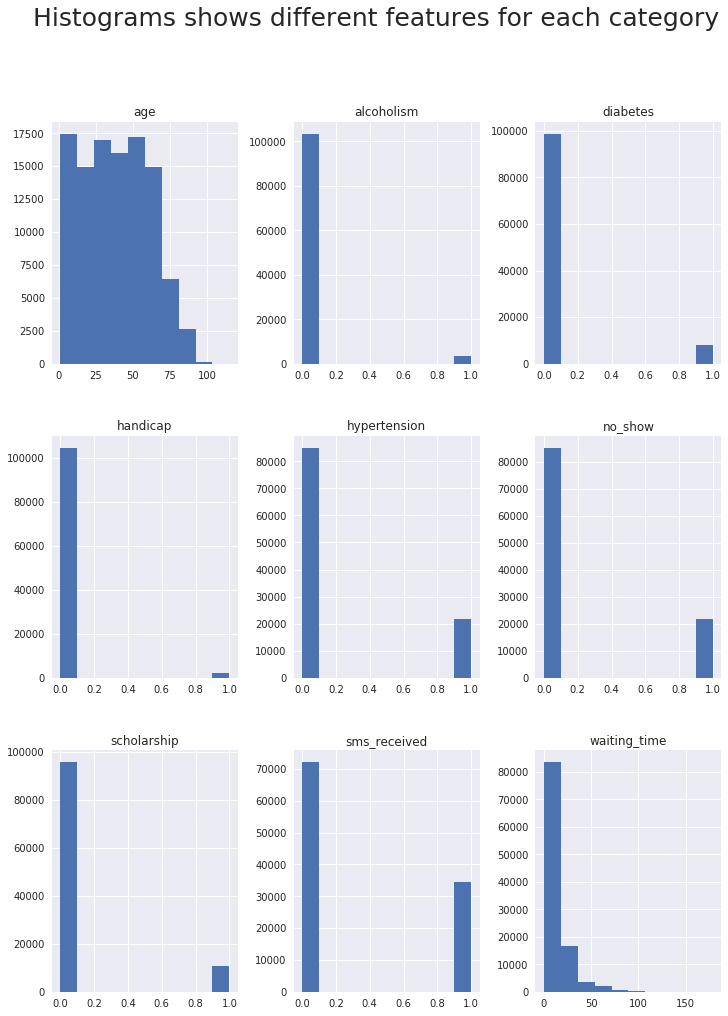

In [70]:
df.hist(figsize=(12,16))
plt.suptitle('Histograms shows different features for each category', fontsize=25);

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 (What is the percentage of patients who show up on their appointements vs. who don't?)

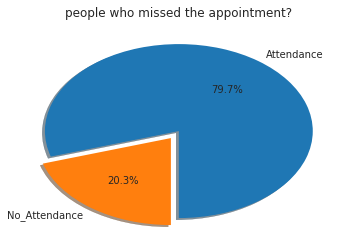

In [71]:
plt.pie(df['no_show'].value_counts(), labels = ['Attendance', 'No_Attendance'], colors=['tab:blue', 'tab:orange'], 
        startangle=270, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
plt.title('people who missed the appointment?')
plt.show()

now we can see that:
  
  the percentage of patients who attend their appointments represents 79.7%
  
  the percentage of patients who didn't attend their appointments represents 20.3%

### Question 2 (Where is the most appointments take place?)

In [72]:
df.describe(include="all")

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories,waiting_time
count,106783,106783.000000,106783,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783.000000,106783,106783.000000
unique,2,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,F,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult,NaN
freq,70006,NaN,7586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82987,NaN
mean,NaN,38.299523,NaN,0.101055,0.203366,0.073982,0.031391,0.019095,0.323441,0.202598,NaN,10.170542
std,NaN,22.453061,NaN,0.301403,0.402504,0.261743,0.174372,0.136859,0.467792,0.401937,NaN,15.266544
min,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,38.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.000000
75%,NaN,56.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,14.000000


The most frequent place is (JARDIM CAMBURI).

###  Question 3 (Does gender affect attending the appointment or not ? )

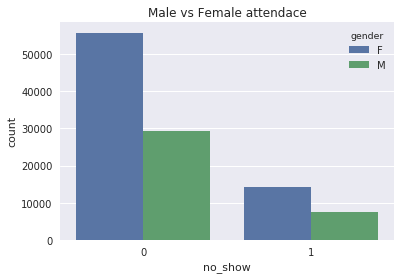

In [73]:
sns.countplot(x=df['no_show'], hue=df['gender']);
plt.title('Male vs Female attendace');

Result show that:

The number of females shows up is greater than the males. Maybe because we have more data on females but that also shows that they vist hospitals more in general.

### Question 4 (Does attendance get affected by age?)

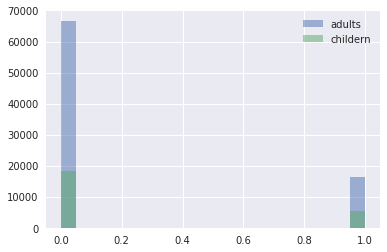

In [74]:
adult = df.age_categories == 'adult'
childern = df.age_categories == 'child'
df.no_show[adult].hist(alpha=0.5 ,label='adults' ,bins=20 )
df.no_show[childern].hist(alpha=0.5 ,label='childern' ,bins=20 )
plt.legend();

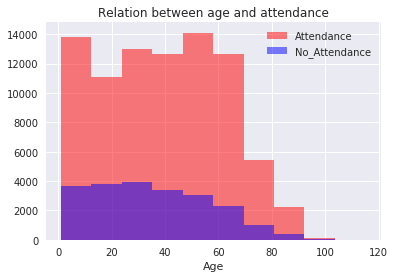

In [75]:
# getting the relation between age and attendance
df.age[Attendance].hist(color='red', label='Attendance' ,alpha=0.5)
df.age[No_Attendance].hist(color='blue', label='No_Attendance',alpha=0.5)
plt.legend()
plt.title('Relation between age and attendance')
plt.xlabel('Age');

We can notice that age affects the attendance occurrence the higher the age the less they attend the appointment .


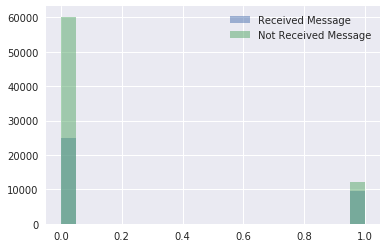

In [76]:
received = df.sms_received == 1
not_received = df.sms_received == 0
df.no_show[received].hist(alpha=0.5 ,label='Received Message' ,bins=20 )
df.no_show[not_received].hist(alpha=0.5 ,label='Not Received Message' ,bins=20 )
plt.legend();

### Question 5 (Does the disease type affect the patient's show up?)

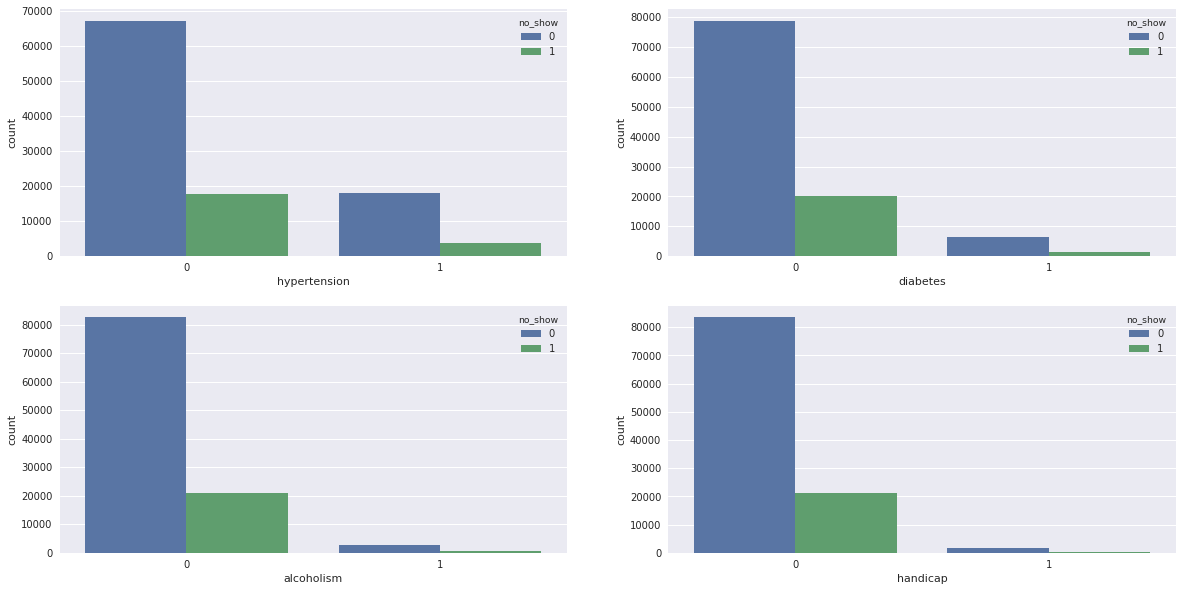

In [77]:
disease_columns = df[['hypertension','diabetes','alcoholism','handicap']]
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(disease_columns['hypertension'],hue=df['no_show'])
plt.subplot(2,2,2)
sns.countplot(disease_columns['diabetes'],hue=df['no_show'])
plt.subplot(2,2,3)
sns.countplot(disease_columns['alcoholism'],hue=df['no_show'])
plt.subplot(2,2,4)
sns.countplot(disease_columns['handicap'],hue=df['no_show'])

Result show that :
   
   We see that most of them don't have a disease and show up for appointments but we notice that patients with hypertension        show up either when they are infected or not which is a mark that hypertension will probably show up more.

### Question 6 (Is the  waiting_time affect the ability to show up ?)

In [78]:
df.groupby("no_show").mean()["waiting_time"]

no_show
0     8.742134
1    15.792595
Name: waiting_time, dtype: float64

Patients Who didn't show up have an average of 15 days between registration day and their appointments.

Patients Who show up have an average of 8 days between registration day and their appointments.

As Duration increases, the ability of patients to show up on their appointments decreases

<a id='conclusions'></a>
## Conclusions

1- "JARDIM CAMBURI" is the most frequent place.

2- Older patients are more committed to their appointments' schedules than younger ones.

3- The percentage of patients who show up on their appointments represents 79.7%.

4- The percentage of patients who Don't show up on their appointments represents 20.3%.

5- As Duration increases, the ability of patients to show up on their appointments decreases.

6- Females are slightly missing their appointment more than men .

7- patients with hypertension show up either when they are infected or not which is a mark that hypertension will probably show    up more.

8- Patients Who didn't show up have an average of 15 days between registration day and their appointments.

## Limitations:

1- the data types of PatientId and AppointmentID need to be strings instead because there's no use to be float or int values      also it can reduce the memory usage.

2- the Age with a negative value was removed because there's no age is less than 0 years!

3- I found some issues in columns like appointment day and scheduled day need to fix to be used as useful data.

4- The Source of data should record the timing of sending SMS to Patients to better investigate the effect of this on Show ups    and why it is not effective as expected.


In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0